In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]
print(X_train.shape[1])
batch_size = 128 
nb_epoch = 20

784


### MLP with 2 hidden layers+ Relu + Adam
##### (no batch normalization,no drop out)

In [12]:
#model config and training
model = Sequential()
print(type(model))
model.add(Dense(256, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2841 - accuracy: 0.9192 - val_loss: 0.1456 - val_accuracy: 0.9555
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9673 - val_loss: 0.0864 - val_accuracy: 0.9725
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0780 - val_accuracy: 0.9748
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 0.0717 - val_accuracy: 0.9766
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0692 - val_accuracy: 0.9780
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0239 - ac

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


Test score: 0.09599106758832932
Test accuracy: 0.9799000024795532


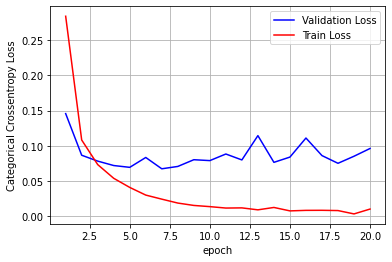

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

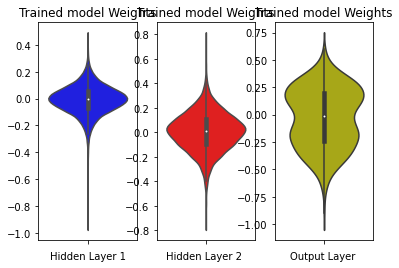

In [15]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 2 hidden layers+ Relu + Adam + Batch normalization

In [16]:
#model config and training
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras import initializers
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2339 - accuracy: 0.9335 - val_loss: 0.1243 - val_accuracy: 0.9631
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9736 - val_loss: 0.0872 - val_accuracy: 0.9729
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0572 - accuracy: 0.9830 - val_loss: 0.0823 - val_accuracy: 0.9743
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0925 - val_accuracy: 0.9710
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0807 - val_accuracy: 0.9739
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0778 - val_accuracy: 0.9772
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0697 - val_accuracy: 0.9780
Epoch 

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________


Test score: 0.07580966502428055
Test accuracy: 0.9811999797821045


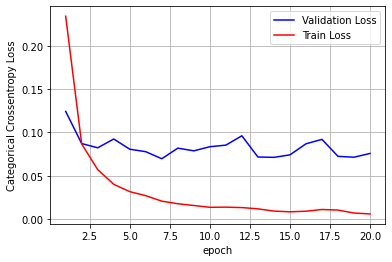

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

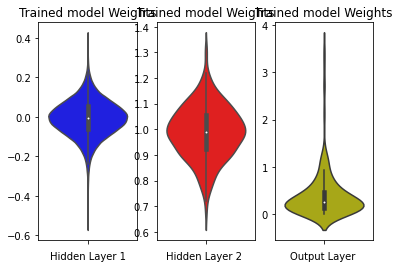

In [19]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 2 hidden layers+ Relu + Adam + Batch normalization + Dropout

In [20]:
#model config and training
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras import initializers
from keras.layers import Dropout
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5634 - accuracy: 0.8299 - val_loss: 0.1816 - val_accuracy: 0.9449
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2729 - accuracy: 0.9210 - val_loss: 0.1295 - val_accuracy: 0.9608
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2125 - accuracy: 0.9385 - val_loss: 0.1109 - val_accuracy: 0.9663
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1785 - accuracy: 0.9487 - val_loss: 0.0980 - val_accuracy: 0.9707
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1668 - accuracy: 0.9516 - val_loss: 0.0914 - val_accuracy: 0.9727
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1517 - accuracy: 0.9556 - val_loss: 0.0898 - val_accuracy: 0.9725
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1433 - accuracy: 0.9576 - val_loss: 0.0820 - val_accuracy: 0.9761
Epoch 

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

Test score: 0.06556333601474762
Test accuracy: 0.980400025844574


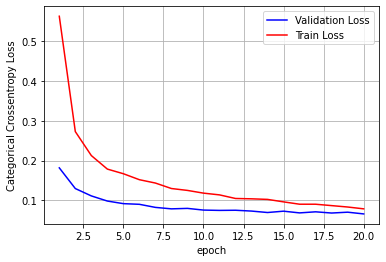

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

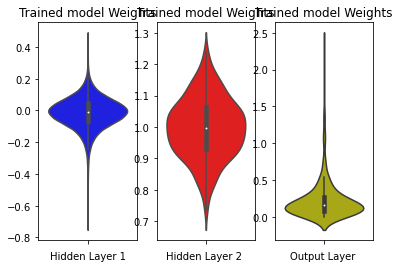

In [23]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 3 hidden layers+ Relu + Adam
##### (no batch normalization,no drop out)

In [24]:
#model config and training
model = Sequential()
print(type(model))
model.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9334 - val_loss: 0.1138 - val_accuracy: 0.9643
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0840 - accuracy: 0.9739 - val_loss: 0.0766 - val_accuracy: 0.9757
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0695 - val_accuracy: 0.9784
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0635 - val_accuracy: 0.9816
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0813 - val_accuracy: 0.9782
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0203 - ac

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________


Test score: 0.0826604887843132
Test accuracy: 0.9832000136375427


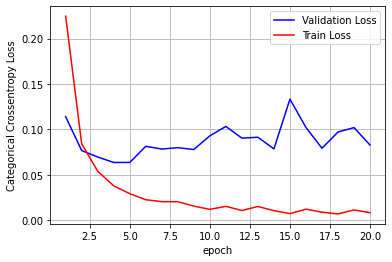

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

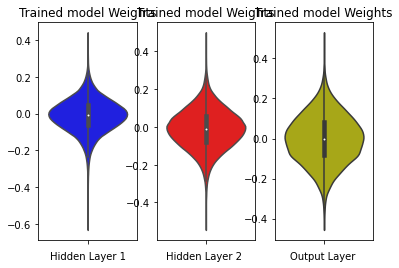

In [27]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 3 hidden layers+ Relu + Adam + Batch normalization

In [28]:
#model config and training
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras import initializers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1934 - accuracy: 0.9423 - val_loss: 0.1029 - val_accuracy: 0.9667
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0736 - accuracy: 0.9768 - val_loss: 0.0818 - val_accuracy: 0.9740
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.1039 - val_accuracy: 0.9685
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.0727 - val_accuracy: 0.9777
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0973 - val_accuracy: 0.9708
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0719 - val_accuracy: 0.9787
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0743 - val_accuracy: 0.9804
Epoch 

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

Test score: 0.05838396027684212
Test accuracy: 0.986299991607666


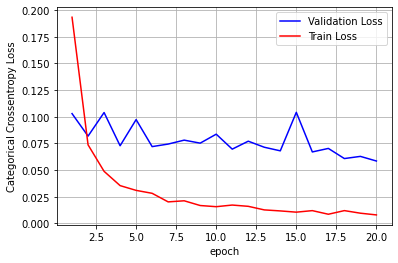

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

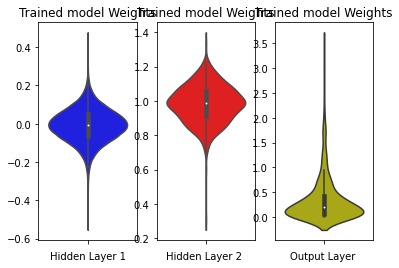

In [31]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 3 hidden layers+ Relu + Adam + Batch normalization + Dropout

In [32]:
#model config and training
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras import initializers
from keras.layers import Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5972 - accuracy: 0.8208 - val_loss: 0.1736 - val_accuracy: 0.9449
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2598 - accuracy: 0.9257 - val_loss: 0.1250 - val_accuracy: 0.9606
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2052 - accuracy: 0.9425 - val_loss: 0.0992 - val_accuracy: 0.9696
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1697 - accuracy: 0.9525 - val_loss: 0.0915 - val_accuracy: 0.9739
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1537 - accuracy: 0.9557 - val_loss: 0.0870 - val_accuracy: 0.9755
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1374 - accuracy: 0.9601 - val_loss: 0.0814 - val_accuracy: 0.9760
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1251 - accuracy: 0.9644 - val_loss: 0.0773 - val_accuracy: 0.9784
Epoch 

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

Test score: 0.06218930706381798
Test accuracy: 0.9839000105857849


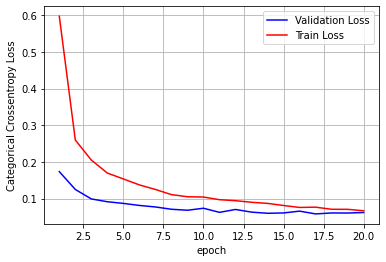

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

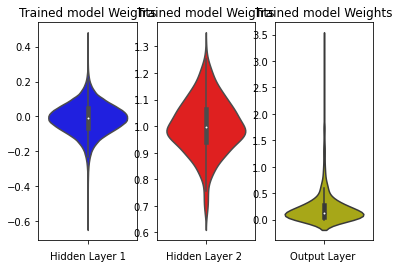

In [35]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 5 hidden layers+ Relu + Adam
##### (no batch normalization,no drop out)

In [36]:
#model config and training
model = Sequential()
print(type(model))
model.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2725 - accuracy: 0.9186 - val_loss: 0.1363 - val_accuracy: 0.9584
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0942 - accuracy: 0.9715 - val_loss: 0.0771 - val_accuracy: 0.9762
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0785 - val_accuracy: 0.9751
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0799 - val_accuracy: 0.9771
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0849 - val_accuracy: 0.9764
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0793 - val_accuracy: 0.9784
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0262 - ac

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

Test score: 0.0949559211730957
Test accuracy: 0.9805999994277954


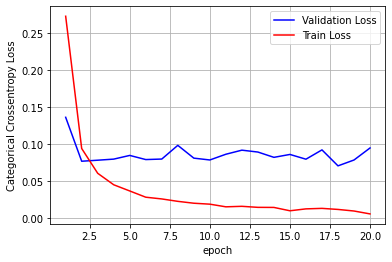

In [38]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

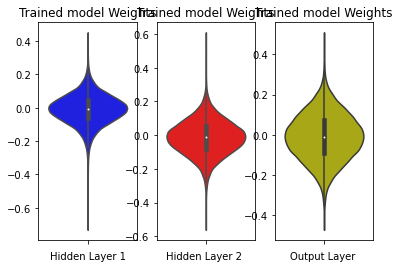

In [39]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 5 hidden layers+ Relu + Adam + Batch normalization

In [40]:
#model config and training
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras import initializers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2432 - accuracy: 0.9318 - val_loss: 0.1165 - val_accuracy: 0.9661
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0904 - accuracy: 0.9728 - val_loss: 0.0921 - val_accuracy: 0.9724
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0882 - val_accuracy: 0.9732
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0812 - val_accuracy: 0.9781
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0716 - val_accuracy: 0.9779
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0756 - val_accuracy: 0.9774
Epoch 

In [41]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_30 (Dense)             (None, 64)               

Test score: 0.07090979069471359
Test accuracy: 0.982699990272522


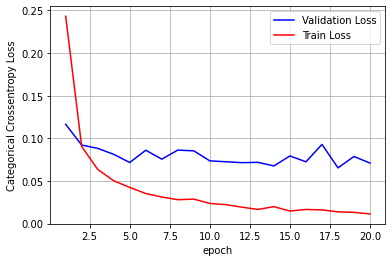

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

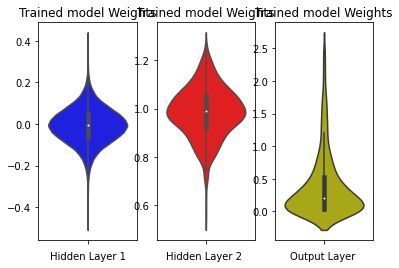

In [43]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### MLP with 5 hidden layers+ Relu + Adam + Batch normalization + Dropout

In [44]:
#model config and training
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras import initializers
from keras.layers import Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.4307 - accuracy: 0.5345 - val_loss: 0.3074 - val_accuracy: 0.9162
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5585 - accuracy: 0.8443 - val_loss: 0.1877 - val_accuracy: 0.9461
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3915 - accuracy: 0.8992 - val_loss: 0.1479 - val_accuracy: 0.9617
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3211 - accuracy: 0.9222 - val_loss: 0.1402 - val_accuracy: 0.9642
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2724 - accuracy: 0.9352 - val_loss: 0.1229 - val_accuracy: 0.9708
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2451 - accuracy: 0.9431 - val_loss: 0.1187 - val_accuracy: 0.9719
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2264 - accuracy: 0.9480 - val_loss: 0.1087 - val_accuracy: 0.9742
Epoch 

In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)              

Test score: 0.08250074088573456
Test accuracy: 0.9829999804496765


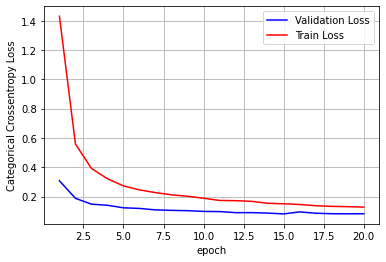

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

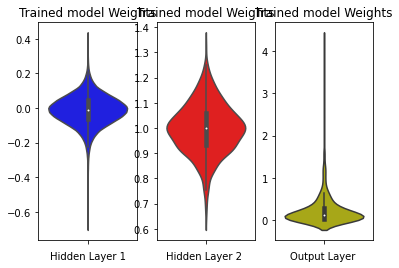

In [47]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

In [64]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["# hidden layers","architecture","Batch_normalization", "dropout", "test loss","test accuracy"]
x.add_row([2,"[256,64]",'no','no',0.0959,0.979])
x.add_row([2,"[256,64]",'yes','no',0.0758,0.981])
x.add_row([2,"[256,64]",'yes','yes',0.0655,0.980])
x.add_row([" "," "," "," "," "," "])
x.add_row([3,"[512,256,64]",'no','no',0.0826,0.983])
x.add_row([3,"[512,256,64]",'yes','no',0.058,0.986])
x.add_row([3,"[512,256,64]",'yes','yes',0.0621,0.983])
x.add_row([" "," "," "," "," "," "])
x.add_row([5,"[512,256,128,64,32]",'no','no',0.0945,0.980])
x.add_row([5,"[512,256,128,64,32]",'yes','no',0.0709,0.982])
x.add_row([5,"[512,256,128,64,32]",'yes','yes',0.0825,0.982])
print(x)

+-----------------+---------------------+---------------------+---------+-----------+---------------+
| # hidden layers |     architecture    | Batch_normalization | dropout | test loss | test accuracy |
+-----------------+---------------------+---------------------+---------+-----------+---------------+
|        2        |       [256,64]      |          no         |    no   |   0.0959  |     0.979     |
|        2        |       [256,64]      |         yes         |    no   |   0.0758  |     0.981     |
|        2        |       [256,64]      |         yes         |   yes   |   0.0655  |      0.98     |
|                 |                     |                     |         |           |               |
|        3        |     [512,256,64]    |          no         |    no   |   0.0826  |     0.983     |
|        3        |     [512,256,64]    |         yes         |    no   |   0.058   |     0.986     |
|        3        |     [512,256,64]    |         yes         |   yes   |   0.0621